<a href="https://colab.research.google.com/github/Imrul2322/Feature-Selection-using-Discriminative-Analysis/blob/main/Visualizing_higher_dimensional_data_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
from keras.datasets import mnist
import numpy as np

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
train_X = train_X.reshape(-1, 784)
test_X = test_X.reshape(-1, 784)
train_X.shape

(60000, 784)

In [ ]:
train_X = (train_X - np.mean(train_X)) / np.std(train_X)
test_X = (test_X - np.mean(test_X)) / np.std(test_X)

In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist = tsne.fit_transform(test_X)

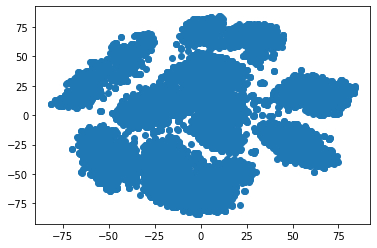

In [ ]:
plt.scatter(dim_two_mnist[:, 0], dim_two_mnist[:, 1])

In [ ]:
labels = test_y

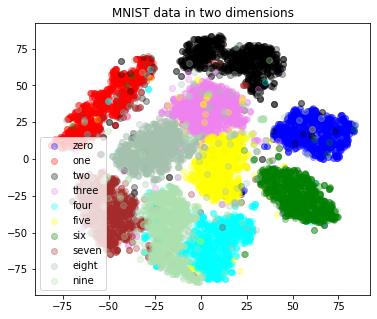

In [ ]:
plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist[labels == 0, 0], dim_two_mnist[labels == 0, 1], color = 'blue', label = 'zero', alpha = 0.3)
plt.scatter(dim_two_mnist[labels == 1, 0], dim_two_mnist[labels == 1, 1], color = 'red', label = 'one', alpha = 0.3)
plt.scatter(dim_two_mnist[labels == 2, 0], dim_two_mnist[labels == 2, 1], color = 'black', label = 'two', alpha = 0.3)
plt.scatter(dim_two_mnist[labels == 3, 0], dim_two_mnist[labels == 3, 1], color = 'violet', label = 'three', alpha = 0.3)
plt.scatter(dim_two_mnist[labels == 4, 0], dim_two_mnist[labels == 4, 1], color = 'cyan', label = 'four', alpha = 0.3)
plt.scatter(dim_two_mnist[labels == 5, 0], dim_two_mnist[labels == 5, 1], color = 'yellow', label = 'five', alpha = 0.3)
plt.scatter(dim_two_mnist[labels == 6, 0], dim_two_mnist[labels == 6, 1], color = 'green', label = 'six', alpha = 0.3)
plt.scatter(dim_two_mnist[labels == 7, 0], dim_two_mnist[labels == 7, 1], color = 'brown', label = 'seven', alpha = 0.3)
plt.scatter(dim_two_mnist[labels == 8, 0], dim_two_mnist[labels == 8, 1], color = '#A3C1AD', label = 'eight', alpha = 0.3)
plt.scatter(dim_two_mnist[labels == 9, 0], dim_two_mnist[labels == 9, 1], color = '#ACE1AF', label = 'nine', alpha = 0.3)
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
predictions = kmeans.fit_predict(dim_two_mnist)

In [ ]:
# filtering label 0 and 1

# clustering with kmeans for selected features
train_X1 = train_X[np.where(train_y == 0), :]
test_X1 = test_X[np.where(test_y == 0), :]

In [ ]:
train_X1 = np.squeeze(train_X1)
test_X1 = np.squeeze(test_X1)

In [ ]:
train_X2 = train_X[np.where(train_y == 1), :]
test_X2 = test_X[np.where(test_y == 1), :]

In [ ]:
train_X2 = np.squeeze(train_X2)
test_X2 = np.squeeze(test_X2)

In [ ]:
test_X1.shape

(980, 784)

In [ ]:
test_X2.shape

(1135, 784)

In [ ]:
train_X_two = np.concatenate([train_X1, train_X2])
test_X_two = np.concatenate([test_X1, test_X2])

In [ ]:
train_y_two_ = np.concatenate([np.zeros(5923), np.ones(6742)])
train_y_two = np.concatenate([np.zeros(5923), np.ones(6742)]).reshape(12665, 1)
print(train_y_two.shape)

test_y_two_ = np.concatenate([np.zeros(980), np.ones(1135)])
test_y_two = np.concatenate([np.zeros(980), np.ones(1135)]).reshape(2115, 1)
print(test_y_two.shape)

(12665, 1)
(2115, 1)


In [ ]:
# dataset = np.append(train_X_two, train_y_two, axis = 1)

dataset = np.append(test_X_two, test_y_two, axis = 1)
dataset.shape

(2115, 785)

In [ ]:
labels = test_y_two_
labels.shape

(2115,)

In [ ]:
print(dataset[:, -1])

[0. 0. 0. ... 1. 1. 1.]


In [ ]:
# train_X_two = (train_X_two - np.mean(train_X_two)) / np.std(train_X_two)
test_X_two = (test_X_two - np.mean(test_X_two)) / np.std(test_X_two)

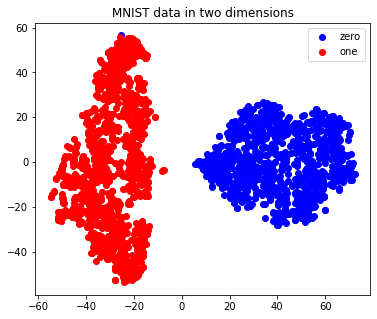

In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist = tsne.fit_transform(test_X_two)
dim_two_mnist.shape

plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist[labels == 0, 0], dim_two_mnist[labels == 0, 1], color = 'blue', label = 'zero')
plt.scatter(dim_two_mnist[labels == 1, 0], dim_two_mnist[labels == 1, 1], color = 'red', label = 'one')
plt.legend()
plt.show()

In [ ]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans
SSE = []

for i in range(1, 5):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
  kmeans.fit(test_X_two)

  SSE.append(kmeans.inertia_)

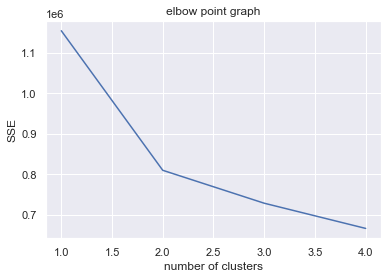

In [ ]:
# plotting the elbow point graph
import seaborn as sns

sns.set()
plt.plot(range(1, 5), SSE)
plt.title('elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
print(test_X_two.shape)

(2115, 784)


In [ ]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 0)
cluster_result = kmeans.fit_predict(test_X_two)

In [ ]:
print(sum(cluster_result))

970


## for entire dataset

In [ ]:
# shuffling rows of the dataset
np.random.shuffle(dataset)

In [ ]:
print(dataset)

[[-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
   1.        ]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
   1.        ]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
   0.        ]
 ...
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
   0.        ]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
   0.        ]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
   0.        ]]


In [ ]:
T_X = dataset[:, :-1]
T_Y = dataset[:, -1]

In [ ]:
print(T_X)

[[-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 ...
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]]


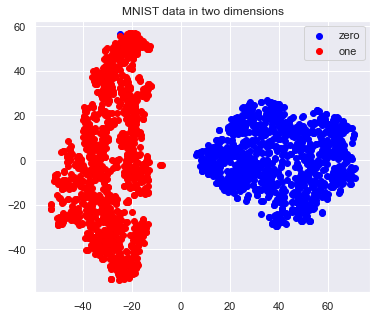

In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist01 = tsne.fit_transform(T_X)

plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist01[T_Y == 0, 0], dim_two_mnist01[T_Y == 0, 1], color = 'blue', label = 'zero')
plt.scatter(dim_two_mnist01[T_Y == 1, 0], dim_two_mnist01[T_Y == 1, 1], color = 'red', label = 'one')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=0)
# dim_two_mnist01 = (dim_two_mnist01 - np.mean(dim_two_mnist01)) / np.std(dim_two_mnist01)
predicted_result = kmeans.fit_predict(dim_two_mnist01)

print(predicted_result)
# print(kmeans.cluster_centers_.shape)

[1 1 0 ... 0 0 0]


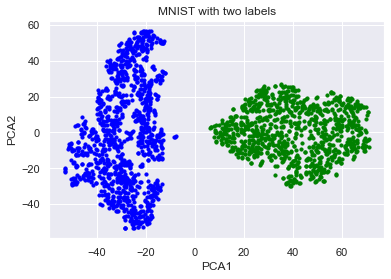

In [ ]:
# visualizeing all the clusters

# plotting all the clusters with centroids
plt.scatter(dim_two_mnist01[predicted_result==0, 0], dim_two_mnist01[predicted_result==0, 1], s = 10, color = 'green', label = 'cluster 1')
plt.scatter(dim_two_mnist01[predicted_result==1, 0], dim_two_mnist01[predicted_result==1, 1], s = 10, color = 'blue', label = 'cluster 2')

# plot the centroids
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, marker = '*', label = 'centroids', color = 'red')

plt.title('MNIST with two labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
accuracy = sum(predicted_result == T_Y)/len(predicted_result)
print(max((1 - accuracy), accuracy))

0.9990543735224586


In [ ]:
import scipy.io as in_out
features = in_out.loadmat('features.mat')

In [ ]:
features_dna = np.squeeze(features['ind'].T)
print(features_dna)

In [ ]:
print(features_dna[0])

444


## 100 features

In [ ]:
dataset_dna = T_X[:, features_dna[:100]]
print(dataset_dna.shape)

(2115, 100)


In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist02 = tsne.fit_transform(dataset_dna)

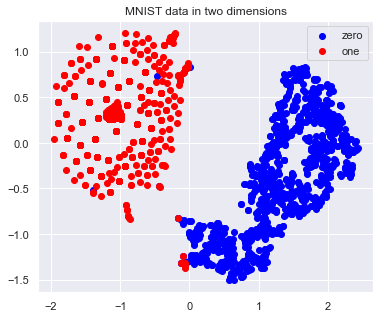

In [ ]:
dim_two_mnist02 = (dim_two_mnist02 - np.mean(dim_two_mnist02)) / np.std(dim_two_mnist02)

plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist02[T_Y == 0, 0], dim_two_mnist02[T_Y == 0, 1], color = 'blue', label = 'zero')
plt.scatter(dim_two_mnist02[T_Y == 1, 0], dim_two_mnist02[T_Y == 1, 1], color = 'red', label = 'one')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=42)

predicted_result = kmeans.fit_predict(dim_two_mnist02)

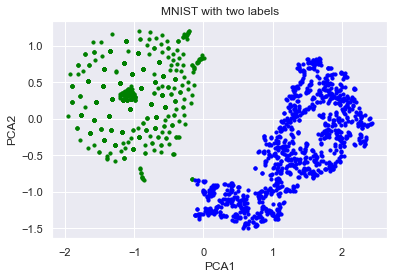

In [ ]:
# visualizeing all the clusters

# plotting all the clusters with centroids
plt.scatter(dim_two_mnist02[predicted_result==0, 0], dim_two_mnist02[predicted_result==0, 1], s = 10, color = 'green', label = 'cluster 1')
plt.scatter(dim_two_mnist02[predicted_result==1, 0], dim_two_mnist02[predicted_result==1, 1], s = 10, color = 'blue', label = 'cluster 2')

# plot the centroids
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, marker = '*', label = 'centroids', color = 'red')

plt.title('MNIST with two labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
accuracy = sum(predicted_result == T_Y)/len(predicted_result)
print(max((1 - accuracy), accuracy))

0.992434988179669


## 75 features

In [ ]:
dataset_dna = T_X[:, features_dna[:75]]
print(dataset_dna)

[[-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527  0.77310687 -0.42680527 ... -0.42680527 -0.42680527
   2.16247883]
 ...
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.363652  ]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]]


In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist02 = tsne.fit_transform(dataset_dna)

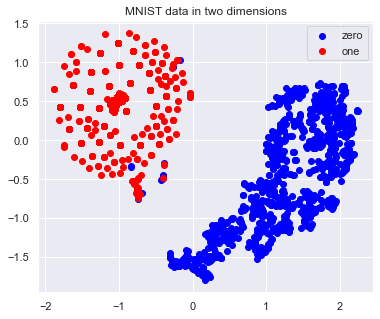

In [ ]:
dim_two_mnist02 = (dim_two_mnist02 - np.mean(dim_two_mnist02)) / np.std(dim_two_mnist02)

plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist02[T_Y == 0, 0], dim_two_mnist02[T_Y == 0, 1], color = 'blue', label = 'zero')
plt.scatter(dim_two_mnist02[T_Y == 1, 0], dim_two_mnist02[T_Y == 1, 1], color = 'red', label = 'one')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=42)

predicted_result = kmeans.fit_predict(dim_two_mnist02)

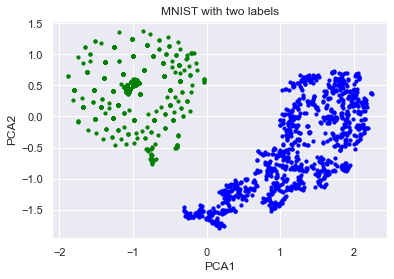

In [ ]:
# visualizeing all the clusters

# plotting all the clusters with centroids
plt.scatter(dim_two_mnist02[predicted_result==0, 0], dim_two_mnist02[predicted_result==0, 1], s = 10, color = 'green', label = 'cluster 1')
plt.scatter(dim_two_mnist02[predicted_result==1, 0], dim_two_mnist02[predicted_result==1, 1], s = 10, color = 'blue', label = 'cluster 2')

# plot the centroids
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, marker = '*', label = 'centroids', color = 'red')

plt.title('MNIST with two labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
accuracy = sum(predicted_result == T_Y)/len(predicted_result)
print(max((1 - accuracy), accuracy))

0.9905437352245863


## 50 features

In [ ]:
dataset_dna = T_X[:, features_dna[:50]]
print(dataset_dna)

[[-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527  0.77310687 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 ...
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]]


In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist02 = tsne.fit_transform(dataset_dna)

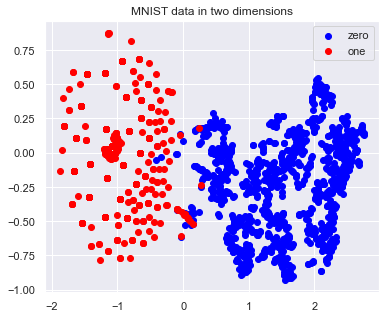

In [ ]:
dim_two_mnist02 = (dim_two_mnist02 - np.mean(dim_two_mnist02)) / np.std(dim_two_mnist02)

plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist02[T_Y == 0, 0], dim_two_mnist02[T_Y == 0, 1], color = 'blue', label = 'zero')
plt.scatter(dim_two_mnist02[T_Y == 1, 0], dim_two_mnist02[T_Y == 1, 1], color = 'red', label = 'one')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=42)

predicted_result = kmeans.fit_predict(dim_two_mnist02)

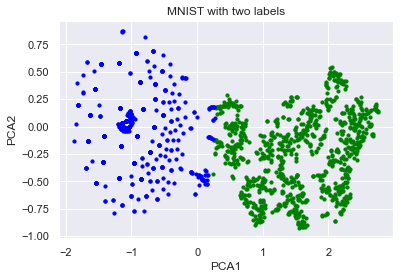

In [ ]:
# visualizeing all the clusters

# plotting all the clusters with centroids
plt.scatter(dim_two_mnist02[predicted_result==0, 0], dim_two_mnist02[predicted_result==0, 1], s = 10, color = 'green', label = 'cluster 1')
plt.scatter(dim_two_mnist02[predicted_result==1, 0], dim_two_mnist02[predicted_result==1, 1], s = 10, color = 'blue', label = 'cluster 2')

# plot the centroids
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, marker = '*', label = 'centroids', color = 'red')

plt.title('MNIST with two labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
accuracy = sum(predicted_result == T_Y)/len(predicted_result)
print(max((1 - accuracy), accuracy))

0.968321513002364


## 25 features

In [ ]:
dataset_dna = T_X[:, features_dna[:25]]
print(dataset_dna)

[[-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527  0.77310687 -0.42680527 ...  2.6929663  -0.42680527
  -0.42680527]
 ...
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]
 [-0.42680527 -0.42680527 -0.42680527 ... -0.42680527 -0.42680527
  -0.42680527]]


In [ ]:
tsne = TSNE(n_components=2, random_state=0, init = 'pca')
dim_two_mnist02 = tsne.fit_transform(dataset_dna)

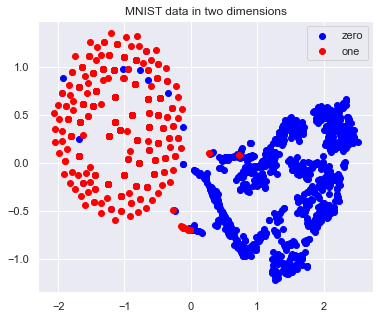

In [ ]:
dim_two_mnist02 = (dim_two_mnist02 - np.mean(dim_two_mnist02)) / np.std(dim_two_mnist02)

plt.figure(figsize = (6, 5))
plt.title('MNIST data in two dimensions')
plt.scatter(dim_two_mnist02[T_Y == 0, 0], dim_two_mnist02[T_Y == 0, 1], color = 'blue', label = 'zero')
plt.scatter(dim_two_mnist02[T_Y == 1, 0], dim_two_mnist02[T_Y == 1, 1], color = 'red', label = 'one')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=42)

predicted_result = kmeans.fit_predict(dim_two_mnist02)

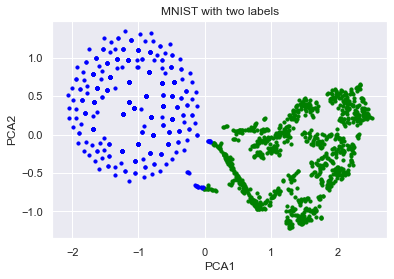

In [ ]:
# visualizeing all the clusters

# plotting all the clusters with centroids
plt.scatter(dim_two_mnist02[predicted_result==0, 0], dim_two_mnist02[predicted_result==0, 1], s = 10, color = 'green', label = 'cluster 1')
plt.scatter(dim_two_mnist02[predicted_result==1, 0], dim_two_mnist02[predicted_result==1, 1], s = 10, color = 'blue', label = 'cluster 2')

# plot the centroids
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, marker = '*', label = 'centroids', color = 'red')

plt.title('MNIST with two labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
accuracy = sum(predicted_result == T_Y)/len(predicted_result)
print(accuracy)

0.9229314420803783
